LED Display Domain data set

Description.

This simple domain contains 7 Boolean attributes, one for each light-emitting diode of a 7-segment display. The task is to determine which digit is been shown in the display. The problem would be easy if not for the introduction of noise. In this case, each attribute value has the 10% probability of having its value inverted.  

@attribute Led1 integer [0, 1]  
@attribute Led2 integer [0, 1]  
@attribute Led3 integer [0, 1]  
@attribute Led4 integer [0, 1]  
@attribute Led5 integer [0, 1]  
@attribute Led6 integer [0, 1]  
@attribute Led7 integer [0, 1]  
@attribute Number {0,1,2,3,4,5,6,7,8,9}  
@inputs Led1, Led2, Led3, Led4, Led5, Led6, Led7  
@outputs Number  

The following experiment makes use of sklearn.ensemble RandomForestClassifier.

In [1]:
from Helper.Load.classification import Classification
from Helper.Visual.classification import VClassification
from Helper.Transform.Transform.classification import Classificaton_Transform
from Helper.Train.Train import Train

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
loadC = Classification("Data", "led7digit.dat", "led7digit-names.txt")

from Data.columns import Column_pipeline_Dictionary 
transformC = Classificaton_Transform(loadC, Column_pipeline_Dictionary, PCA)

from Data.hyperparameters import hyperparameters
trainC = Train(loadC, RandomForestClassifier, Classificaton_Transform, Column_pipeline_Dictionary, LinearDiscriminantAnalysis, hyperparameters)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<img src="Data/Visual/Andrew.png">
Andrew Curve displaying raw data.

<img src="Data/Visual/ClassBalance.png">

In [3]:
#loadC.data.head()
transformC.data

array([[ 0.0648154 , -0.23899667, -0.73640013, ..., -0.38932678,
        -0.20060666, -0.34705251],
       [ 0.59056432,  0.14239868,  0.48520671, ..., -0.4656214 ,
         0.54182567,  0.30357427],
       [-0.4667262 ,  0.31951307,  0.44353668, ..., -0.00671374,
        -0.53740309, -0.08168464],
       ...,
       [ 1.18473006,  0.35401048,  0.1048216 , ...,  0.83809527,
        -0.23440785, -0.09032111],
       [ 0.0648154 , -0.23899667, -0.73640013, ..., -0.38932678,
        -0.20060666, -0.34705251],
       [ 1.04268836, -0.39221496,  0.04141146, ..., -0.22837206,
         0.29380685, -0.13798448]])

In [4]:
pipe = trainC.pipeline

In [5]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'inputs_pipeline', 'global', 'estimator', 'inputs_pipeline__memory', 'inputs_pipeline__steps', 'inputs_pipeline__inputs', 'inputs_pipeline__inputs__n_jobs', 'inputs_pipeline__inputs__transformer_list', 'inputs_pipeline__inputs__transformer_weights', 'inputs_pipeline__inputs__Led1', 'inputs_pipeline__inputs__Led2', 'inputs_pipeline__inputs__Led3', 'inputs_pipeline__inputs__Led4', 'inputs_pipeline__inputs__Led5', 'inputs_pipeline__inputs__Led6', 'inputs_pipeline__inputs__Led7', 'inputs_pipeline__inputs__Led1__memory', 'inputs_pipeline__inputs__Led1__steps', 'inputs_pipeline__inputs__Led1__Led1_selector', 'inputs_pipeline__inputs__Led1___LabelBinarizer_transform', 'inputs_pipeline__inputs__Led1__Led1_selector__key', 'inputs_pipeline__inputs__Led2__memory', 'inputs_pipeline__inputs__Led2__steps', 'inputs_pipeline__inputs__Led2__Led2_selector', 'inputs_pipeline__inputs__Led2___LabelBinarizer_transform', 'inputs_pipeline__inputs__Led2__Led2_selector__key', 'inpu

In [6]:
hyperparameters

{'estimator__max_depth': [1, 2, 4, 8, 10],
 'estimator__n_estimators': [100, 110, 120, 200, 250, 300],
 'estimator__class_weight': ['balanced'],
 'global__globals__n_components': [1, 2, 3, 4, 5, 6, 7]}

In [7]:
clf = trainC.fit_GSCV()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
clf.best_params_

{'estimator__class_weight': 'balanced',
 'estimator__max_depth': 2,
 'estimator__n_estimators': 110,
 'global__globals__n_components': 7}

In [9]:
preds = clf.predict(loadC.partition.X_test)
np.mean(preds == loadC.partition.y_test.values.ravel())

0.7393939393939394

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(loadC.partition.y_test.values, preds)

array([[11,  0,  0,  0,  0,  0,  1,  0,  1,  2],
       [ 0,  8,  0,  1,  0,  1,  0,  2,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  1,  1, 14,  0,  1,  0,  0,  0,  2],
       [ 0,  1,  0,  0, 13,  1,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 16,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 13,  0,  2,  0],
       [ 1,  2,  2,  0,  1,  1,  0, 12,  0,  0],
       [ 1,  0,  1,  2,  0,  1,  2,  0,  9,  1],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  3, 11]])

In [11]:
print(classification_report(loadC.partition.y_test.values, preds))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.67      0.67      0.67        12
           2       0.71      0.88      0.79        17
           3       0.82      0.74      0.78        19
           4       0.87      0.76      0.81        17
           5       0.73      0.94      0.82        17
           6       0.72      0.81      0.76        16
           7       0.86      0.63      0.73        19
           8       0.60      0.53      0.56        17
           9       0.61      0.69      0.65        16

   micro avg       0.74      0.74      0.74       165
   macro avg       0.74      0.74      0.74       165
weighted avg       0.75      0.74      0.74       165



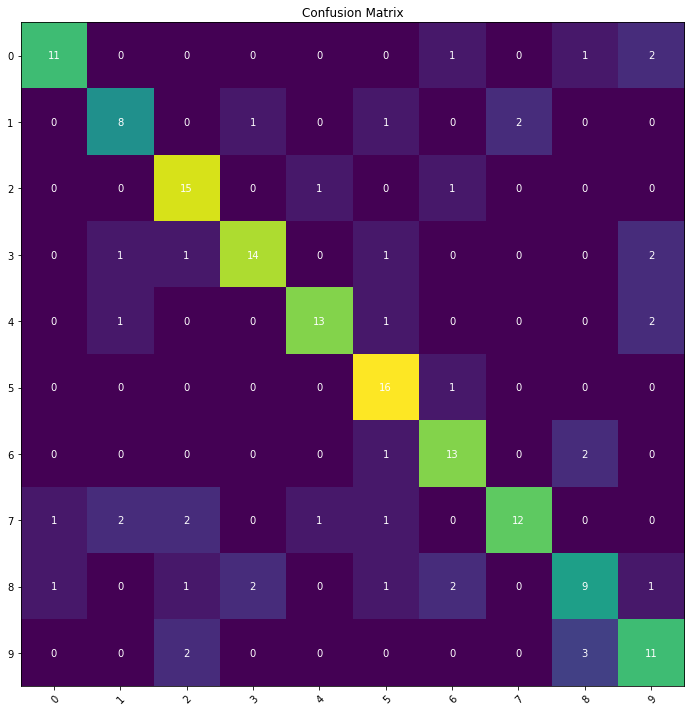

In [25]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

class_ = np.unique(loadC.data[loadC.outputs].values)

harvest = confusion_matrix(loadC.partition.y_test.values, preds)

fig, ax = plt.subplots()
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(class_)))
ax.set_yticks(np.arange(len(class_)))

ax.set_xticklabels(class_)
ax.set_yticklabels(class_)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(class_)):
    for j in range(len(class_)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()